In [1]:
import sympy as sym
import numpy as np
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from CCSbasis import CCSbasis

In [2]:
def rotationGlobalX(alpha):
    return np.array([[1,0,0],[0,np.cos(alpha),-np.sin(alpha)],[0,np.sin(alpha),np.cos(alpha)]])

def rotationGlobalY(beta):
    return np.array([[np.cos(beta),0,np.sin(beta)], [0,1,0],[-np.sin(beta),0,np.cos(beta)]])

def rotationGlobalZ(gamma):
    return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]])

def rotationLocalX(alpha):
    return np.array([[1,0,0],[0,np.cos(alpha),np.sin(alpha)],[0,-np.sin(alpha),np.cos(alpha)]])

def rotationLocalY(beta):
    return np.array([[np.cos(beta),0,-np.sin(beta)], [0,1,0],[np.sin(beta),0,np.cos(beta)]])

def rotationLocalZ(gamma):
    return np.array([[np.cos(gamma),np.sin(gamma),0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])

<IPython.core.display.Javascript object>


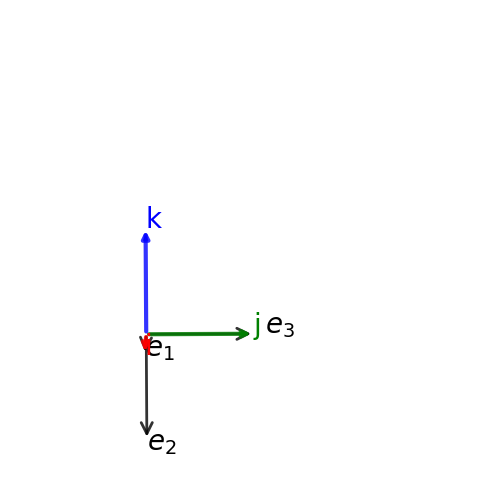

3
[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]


In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['figure.figsize']=20,20

RX = rotationGlobalX(np.pi/3)
RY = rotationGlobalY(np.pi/3)
RZ = rotationGlobalZ(np.pi/3)
Rx = rotationLocalX(np.pi/2)
Ry = rotationLocalY(np.pi/2)
Rz = rotationLocalZ(np.pi/2)


e1 = np.array([[1,0,0]])
e2 = np.array([[0,1,0]])
e3 = np.array([[0,0,1]])

basis = np.vstack((e1,e2,e3))
basisRot = RZ@RY@RX@basis
basisRotLoc = Rx@basis
CCSbasis(Oijk=np.array([0,0,0]), Oxyz=np.array([0,0,0]), ijk=basis.T, xyz=basisRotLoc.T, vector=False)


In [ ]:


coefs = (1, 3, 15)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))


fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

RX = rotationGlobalX(np.pi/3)
RY = rotationGlobalY(np.pi/3)
RZ = rotationGlobalZ(np.pi/3)
Rx = rotationLocalX(np.pi/3)
Ry = rotationLocalY(np.pi/3)
Rz = rotationLocalZ(np.pi/3)

rRotx = RY@RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

In [ ]:
np.sin(np.arccos(0.7))

In [ ]:
print(RZ@RY@RX)

In [ ]:
import sympy as sym
sym.init_printing()

In [ ]:
a,b,g = sym.symbols('alpha, beta, gamma')

In [ ]:
RX = sym.Matrix([[1,0,0],[0,sym.cos(a),-sym.sin(a)],[0,sym.sin(a),sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b),0,sym.sin(b)],[0,1,0],[-sym.sin(b),0,sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g),-sym.sin(g),0],[sym.sin(g),sym.cos(g),0],[0,0,1]])
RX,RY,RZ

In [ ]:
R = RZ@RY@RX
R

In [ ]:
mm = np.array([2.71, 10.22, 26.52])
lm = np.array([2.92, 10.10, 18.85])
fh = np.array([5.05, 41.90, 15.41])
mc = np.array([8.29, 41.88, 26.52])
ajc = (mm + lm)/2
kjc = (fh + mc)/2

In [ ]:
i = np.array([1,0,0])
j = np.array([0,1,0])
k = np.array([0,0,1])
v1 = kjc - ajc
v1 = v1 / np.sqrt(v1[0]**2+v1[1]**2+v1[2]**2)
v2 = (mm-lm) - ((mm-lm)@v1)*v1
v2 = v2/ np.sqrt(v2[0]**2+v2[1]**2+v2[2]**2)
v3 = k - (k@v1)*v1 - (k@v2)*v2
v3 = v3/ np.sqrt(v3[0]**2+v3[1]**2+v3[2]**2)

In [ ]:
v1

In [ ]:
R = np.array([v1,v2,v3])
RGlobal = R.T
RGlobal

In [ ]:
alpha = np.arctan2(RGlobal[2,1],RGlobal[2,2])*180/np.pi
alpha

In [ ]:
beta = np.arctan2(-RGlobal[2,0],np.sqrt(RGlobal[2,1]**2+RGlobal[2,2]**2))*180/np.pi
beta

In [ ]:
gamma = np.arctan2(RGlobal[1,0],RGlobal[0,0])*180/np.pi
gamma

In [ ]:
R2 = np.array([[0, 0.71, 0.7],[0,0.7,-0.71],[-1,0,0]])
R2

In [ ]:
alpha = np.arctan2(R[2,1],R[2,2])*180/np.pi
alpha

In [ ]:
gamma = np.arctan2(R[1,0],R[0,0])*180/np.pi
gamma

In [ ]:
beta = np.arctan2(-R[2,0],np.sqrt(R[2,1]**2+R[2,2]**2))*180/np.pi
beta

In [ ]:
R = RY@RZ@RX
R

In [ ]:
alpha = np.arctan2(-R2[1,2],R2[1,1])*180/np.pi
alpha

In [ ]:
gamma = 0

In [ ]:
beta = 90

In [ ]:
import sympy as sym


In [ ]:
sym.init_printing()

In [ ]:
a,b,g = sym.symbols('alpha, beta, gamma')

In [ ]:
RX = sym.Matrix([[1,0,0],[0,sym.cos(a), -sym.sin(a)],[0,sym.sin(a), sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b),0, sym.sin(b)],[0,1,0],[-sym.sin(b),0, sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g), -sym.sin(g), 0],[sym.sin(g), sym.cos(g),0],[0,0,1]])
RX,RY,RZ

In [ ]:
RXYZ = RZ*RY*RX
RXYZ

In [ ]:
RZXY = RZ*RX*RY
RZXY

In [ ]:
x = []


In [ ]:
len(x)

In [ ]:
basis

In [ ]:
RX@basis

In [30]:
import sympy as sym

In [35]:
a,b,g = sym.symbols('alpha, beta, gamma')
RX = sym.Matrix([[1,0,0],
                 [0,sym.cos(a), -sym.sin(a)],
                 [0,sym.sin(a), sym.cos(a)]])

RY = sym.Matrix([[sym.sin(b),0, sym.cos(b)],
                 [0,1, 0],
                 [sym.cos(b),0, -sym.sin(b)]])

RZ = sym.Matrix([[sym.cos(g),-sym.sin(g),0],
                 [sym.sin(g),sym.cos(g),0],
                 [0,0, 1]])
RZ

Matrix([
[cos(gamma), -sin(gamma), 0],
[sin(gamma),  cos(gamma), 0],
[         0,           0, 1]])

In [38]:
RZ*RY*RX

Matrix([
[sin(beta)*cos(gamma), sin(alpha)*cos(beta)*cos(gamma) - sin(gamma)*cos(alpha),  sin(alpha)*sin(gamma) + cos(alpha)*cos(beta)*cos(gamma)],
[sin(beta)*sin(gamma), sin(alpha)*sin(gamma)*cos(beta) + cos(alpha)*cos(gamma), -sin(alpha)*cos(gamma) + sin(gamma)*cos(alpha)*cos(beta)],
[           cos(beta),                                   -sin(alpha)*sin(beta),                                    -sin(beta)*cos(alpha)]])